# Ejercicio Naive Bayes

Primero cargo el dataset "iris"

In [6]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target

Normalizo los datos

In [7]:
from sklearn import preprocessing
# normalize the data attributes
normalized_X = preprocessing.normalize(X)

Se implementa Gaussian Naive Bayes con CrossValidation

In [8]:
from sklearn.naive_bayes import GaussianNB
from sklearn import cross_validation

gnb = GaussianNB()
scores = cross_validation.cross_val_score(gnb, normalized_X, y, cv=5)
scores

array([ 1.        ,  1.        ,  0.96666667,  0.93333333,  1.        ])

Realizo una prediccion e imprimo la matriz de confusion

Normalized confusion matrix
[[ 1.    0.    0.  ]
 [ 0.    0.94  0.06]
 [ 0.    0.    1.  ]]


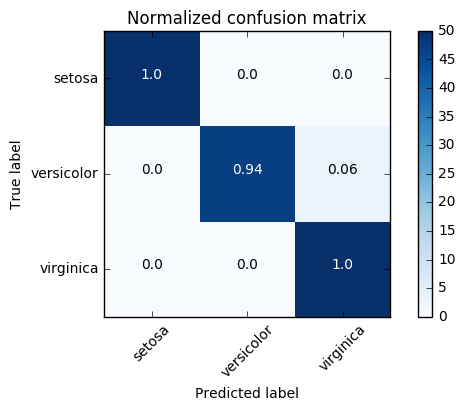

In [16]:
import itertools
from sklearn.metrics import confusion_matrix
%matplotlib inline
import matplotlib.pyplot as plt

y_pred = cross_validation.cross_val_predict(gnb, normalized_X, y, cv=5)

# Compute confusion matrix
cnf_matrix = confusion_matrix(y, y_pred)

class_names = iris.target_names

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print("Normalized confusion matrix")
    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Normalized confusion matrix')
plt.show()

# Ejercicio FDR (False Discovery Rate)

In [3]:
from astropy.io import fits
hdulist = fits.open('2MASS.J.990313N_JI0590162.fits')
hdulist.info()

Filename: 2MASS.J.990313N_JI0590162.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU     134   (512, 1024)   float32   


In [4]:
scidata = hdulist[0].data
scidata.shape

(1024, 512)

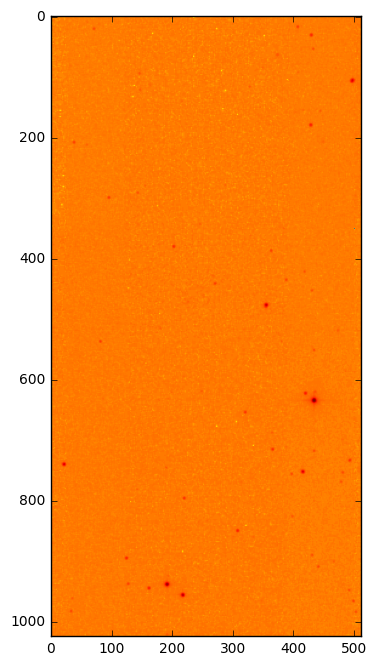

In [29]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

#obtengo el valor minimo del array
minValue = scidata.min()
#Normalizo la imagen sumando el valor absoluto del minimo
scidataPositiveNormaliced = scidata+abs(minValue)+0.00000000001

fig, ax = plt.subplots()
fig.set_size_inches(11,8)
ax.imshow(np.log10(scidataPositiveNormaliced))
plt.show()

In [39]:
# %matplotlib inline
# import matplotlib.pyplot as plt
# import numpy as np
# import numpy.ma as ma
# #enmascaro el array
# maskedArray = ma.MaskedArray(scidata, mask=(scidata<=0), fill_value = 999999)
# maskedArrayValid = maskedArray[~maskedArray.mask]
# # print(maskedArray[~maskedArray.mask])
# fig, ax = plt.subplots()
# fig.set_size_inches(11,8)
# imgplot = ax.imshow(np.log10(maskedArray))

Mean= 3.55194
Sigma= 22.7636


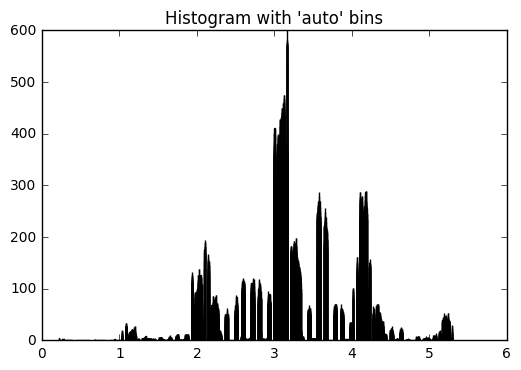

In [8]:
mean = np.mean(scidataPositiveNormaliced)
print("Mean=",mean)
sigma = np.std(scidataPositiveNormaliced)
print("Sigma=",sigma)
plt.hist(scidataPositiveNormaliced, bins='auto')  # plt.hist passes it's arguments to np.histogram
plt.title("Histogram with 'auto' bins")
plt.show()

/home/ezequiel/.local/lib/python3.4/site-packages/ipykernel/__main__.py:6: RuntimeWarning: divide by zero encountered in log10
/home/ezequiel/.local/lib/python3.4/site-packages/ipykernel/__main__.py:6: RuntimeWarning: invalid value encountered in log10


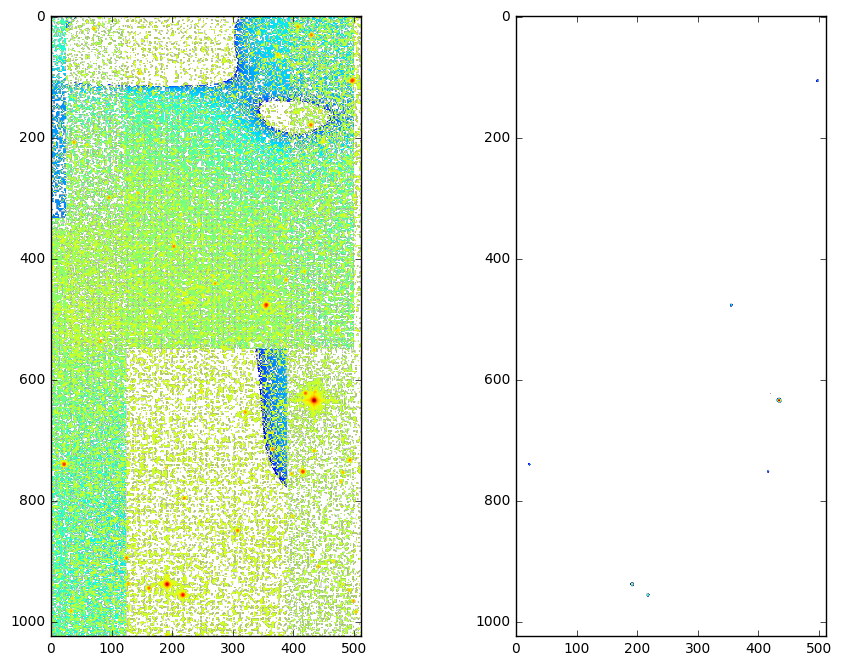

In [36]:
fiveSigmaMasked = ma.MaskedArray(data = scidataPositiveNormaliced, 
                              mask = scidataPositiveNormaliced<=5*sigma)

plt.figure(1, figsize=(11,8))
plt.subplot(121)
plt.imshow(np.log10(maskedArray))

plt.subplot(122)
plt.imshow(np.log10(fiveSigmaMasked))
plt.show()